In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
uploaded = files.upload()





Saving cars_5600 (1).csv to cars_5600 (1) (1).csv


In [58]:
df = pd.read_csv("cars_5600 (1) (1).csv")
df
print(df.head())
print(df.tail())
print(df.shape)

   Car_ID     Brand    Model    Year Engine_Size Fuel_Type Transmission  \
0     1.0  Mahindra     Thar  2023.0         2.6       CNG    Automatic   
1     2.0    Maruti      NaN  2020.0         3.6       NaN    Automatic   
2     3.0    Toyota  Corolla  2019.0         4.4    Petrol    Automatic   
3     4.0      Tata  Harrier  2021.0         3.1       CNG       Manual   
4     5.0       bmw       X5  2024.0         0.9  Electric    Automatic   

  Mileage_kmpl  Owner Kilometers_Driven      Price  
0         12.8    3.0           49255.0  1549000.0  
1         16.4    2.0          151079.0   628000.0  
2         27.2    3.0           77552.0   644000.0  
3         15.3    1.0          117169.0   376000.0  
4         27.2    2.0          100011.0  7091000.0  
      Car_ID   Brand    Model    Year Engine_Size Fuel_Type Transmission  \
5679  1587.0    Tata  Harrier  2009.0         1.8    Diesel    Automatic   
5680  2705.0   honda     Jazz  2020.0         3.4    Diesel    Automatic   
568

In [48]:

# Check missing values
print("\nMissing values per column:\n", df.isna().sum())

# Check duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())
df.describe()


Missing values per column:
 Car_ID               228
Brand                138
Model                226
Year                 225
Engine_Size          229
Fuel_Type            225
Transmission         227
Mileage_kmpl         225
Owner                229
Kilometers_Driven    225
Price                224
dtype: int64

Duplicate rows: 33


,Car_ID,Owner
count,5456.000000,5455.000000
mean,2800.000916,2.001650
std,1617.707560,0.807576
min,1.000000,1.000000
25%,1400.750000,1.000000
50%,2798.500000,2.000000
75%,4205.250000,3.000000
max,5600.000000,3.000000


In [49]:
#DATA PREPROCESSING PART
#Remove duplicates
df.drop_duplicates(inplace=True)

#Replace 'Unknown' with NaN
df.replace("Unknown", np.nan, inplace=True)

#Convert numeric columns to proper type
num_cols = ["Year", "Engine_Size", "Mileage_kmpl", "Kilometers_Driven", "Price"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#Drop rows with missing Price (target)
df.dropna(subset=["Price"], inplace=True)

#Fill missing numeric values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

#Fill missing categorical values with mode
cat_cols = ["Brand", "Model", "Fuel_Type", "Transmission", "Owner"]
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Clean brand text (lowercase, strip spaces)
df["Brand"] = df["Brand"].astype(str).str.strip().str.lower()

# Clip outliers to avoid extreme skew
for col in ["Price", "Mileage_kmpl", "Kilometers_Driven", "Engine_Size"]:
    q1, q3 = df[col].quantile([0.05, 0.95])
    df[col] = df[col].clip(q1, q3)

#Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])



/tmp/ipython-input-1605219637.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1605219637.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [50]:
df.shape

(5375, 11)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X = df.drop(columns=["Car_ID", "Price"])
y = df["Price"]

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE):", mae)
print(f"Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE):", rmse)
print(f"R² Score:",r2)

Mean Absolute Error (MAE): 878476.068945731
Mean Squared Error (MSE): 1438972669483.3154
Root Mean Squared Error (RMSE): 1199571.8692447382
R² Score: 0.3080092724617003


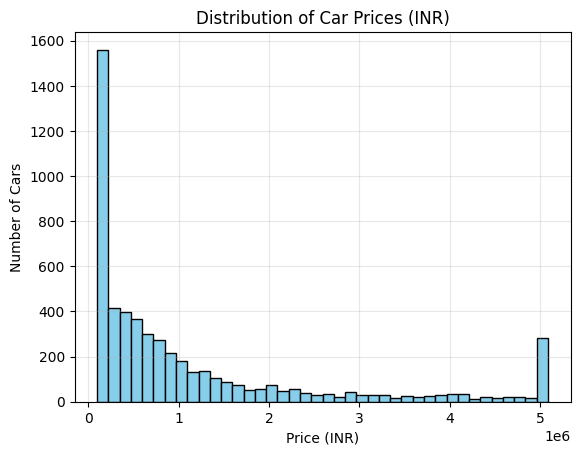

In [55]:
plt.hist(df["Price"], bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Car Prices (INR)")
plt.xlabel("Price (INR)")
plt.ylabel("Number of Cars")
plt.grid(alpha=0.3)
plt.show()

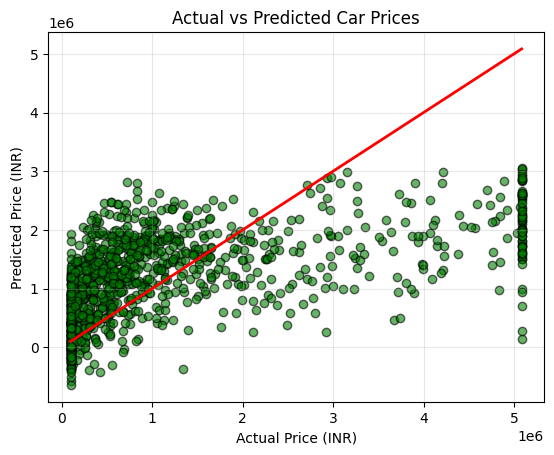

In [56]:
plt.scatter(y_test, y_pred, color='green', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Car Prices")
plt.xlabel("Actual Price (INR)")
plt.ylabel("Predicted Price (INR)")
plt.grid(alpha=0.3)
plt.show()